# Home Exercise on Logistic Regression

## Task Description

Implement a **logistic regression** model using **gradient descent, Adam, or any other optimization method** to optimize the parameters.

- You are **only allowed** to use **computational libraries** such as **NumPy, Math, etc.** for implementing the **model and training process**.
- You **must not** use machine learning libraries or frameworks like **scikit-learn, TensorFlow, PyTorch, etc.** that provide pre-built models.
- For other tasks (e.g., data processing, visualization), you are free to use **any library**.

After implementing the model, use it to solve the following problem:  
[**Titanic - Machine Learning from Disaster**](https://www.kaggle.com/competitions/titanic/)

---

## Submission Guidelines

- Submit **only one Jupyter Notebook** file that:
  1. **Handles all tasks**, including **data downloading, preprocessing, model training** and **evaluation**.
  2. **Generates a CSV** result file.
  3. **Includes an image** of the submission results on Kaggle.

- **Important**:
  - **Submissions not following the guidelines will receive a score of 0.**
  - The model’s **accuracy must be at least 65%**, and the instructor will re-submit your result file to verify model integrity.

---

## Grading Criteria

For valid submissions, scores will be assigned based on the **leaderboard ranking** (**strictly greater**):

| Leaderboard Ranking | Score |
|---------------------|-------|
| **Top 25%**        | **10 points** |
| **25% - 50%**      | **9.0 points** |
| **50% - 75%**      | **8.0 points** |
| **75% - 100%**     | **7.0 points** |


# Download and Import

In [76]:
%pip install gdown pandas numpy matplotlib scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
%pip install --upgrade seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import gdown
import zipfile
import sys
import os
import platform
import re
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # i use this here to test the model
from sklearn.preprocessing import OneHotEncoder
from itertools import product  
from statistics import mode


In [79]:
# Python environment details
print("Python executable being used:", sys.executable)
print("Python version:", sys.version)

# Operating System details
print("Operating System:", platform.system())
print("OS Version:", platform.version())
print("OS Release:", platform.release())

# Machine and architecture details
print("Machine:", platform.machine())

# Visual Studio Code details (based on environment variable)
vscode_info = os.environ.get('VSCODE_PID', None)
if vscode_info:
    print("Running in Visual Studio Code")
else:
    print("Not running in Visual Studio Code")

Python executable being used: c:\Python312\python.exe
Python version: 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
Operating System: Windows
OS Version: 10.0.19045
OS Release: 10
Machine: AMD64
Running in Visual Studio Code


In [80]:
if not vscode_info:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

In [81]:
# https://drive.google.com/file/d/1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA/view?usp=sharing
if vscode_info:
    # Define the destination directory
    output_dir = "Data2"  # Change this to your desired directory

    # Ensure the directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Download the file
    url = "https://drive.google.com/uc?id=1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA"
    output_zip = "titanic.zip"
    gdown.download(url, output_zip, quiet=False)

    # Extract all contents to the specified directory
    with zipfile.ZipFile(output_zip, "r") as zip_ref:
        zip_ref.extractall(output_dir)

    print(f"Files extracted to: {output_dir}")

Downloading...
From: https://drive.google.com/uc?id=1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA
To: e:\2_LEARNING_BKU\2_File_2\K22_HK242\CO3085_NLP\BT\Lab06\titanic.zip
100%|██████████| 34.9k/34.9k [00:00<00:00, 546kB/s]

Files extracted to: Data2


In [82]:
# Load Titanic dataset from Kaggle
# https://drive.google.com/file/d/1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA/view?usp=sharing
train_data_path = "Data2/train.csv"  
train = pd.read_csv(train_data_path)

test_data_path = "Data2/test.csv"
test = pd.read_csv(test_data_path)

target = train.Survived

print("✅ Dataset loaded successfully!")
print("📊 First few rows of the dataset:")
train.head()


✅ Dataset loaded successfully!
📊 First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [83]:
print(f'Unique Values in Pclass :{train.Pclass.unique()}')

Unique Values in Pclass :[3 1 2]


In [84]:
print(f'Unique Values in SibSp :{train.SibSp.unique()}')

Unique Values in SibSp :[1 0 3 4 2 5 8]


nan found!

In [85]:
print(f'Unique Values in Embarked :{train.Embarked.unique()}')

Unique Values in Embarked :['S' 'C' 'Q' nan]


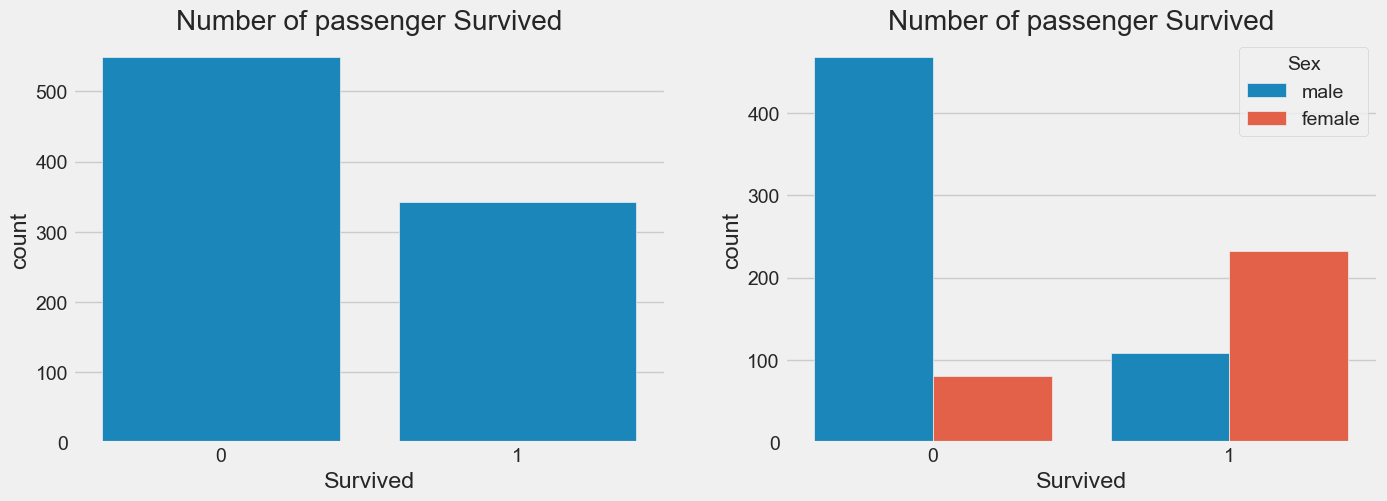

In [86]:
plt.figure(figsize=(15,5))

# First subplot
plt.subplot(1,2,1)
sns.countplot(x=train["Survived"])  # Explicitly using x=
plt.title('Number of passenger Survived')

# Second subplot
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived')

plt.show()

more number of non-survived people and females are more likely to survived than male!. so, 'Sex' looks like a very strong explanatory variable, and it can be good choice for our model!

Now see null value in the train set

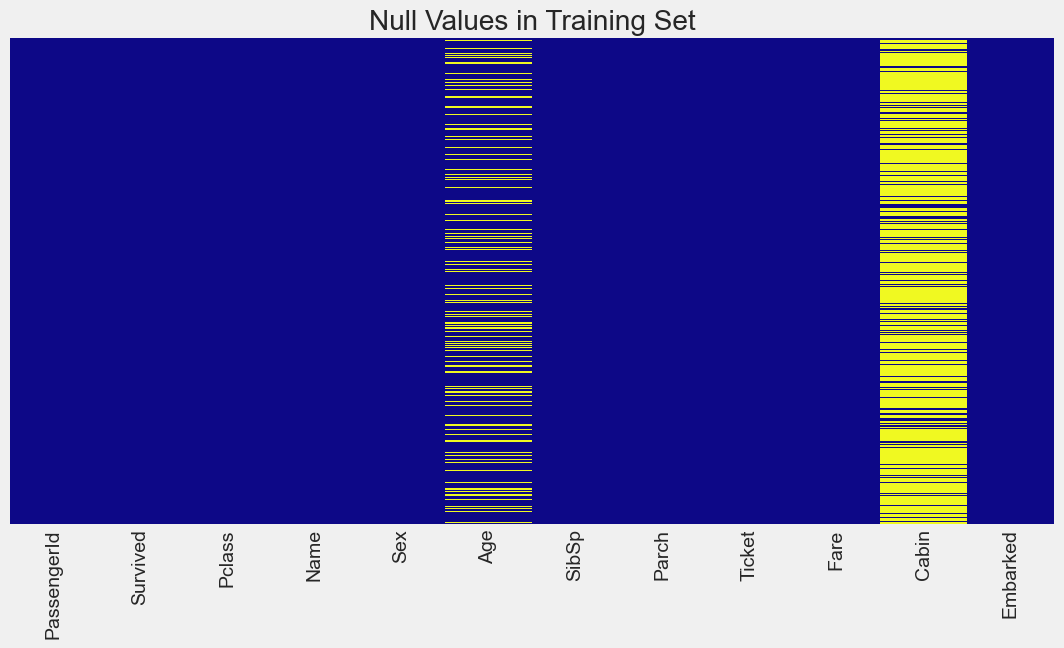

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma', cbar=False)
plt.title('Null Values in Training Set')
plt.show()


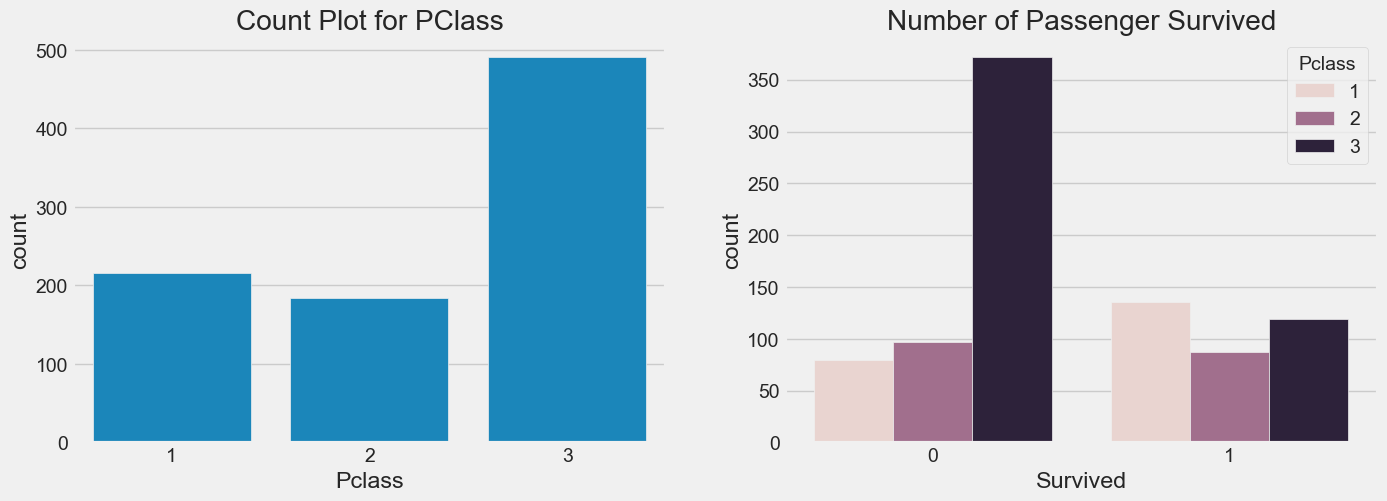

In [88]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

# First subplot: Count Plot for PClass
plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=train)  # Corrected
plt.title('Count Plot for PClass')

# Second subplot: Survival Count by PClass
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of Passenger Survived')

plt.show()


<Axes: ylabel='Frequency'>

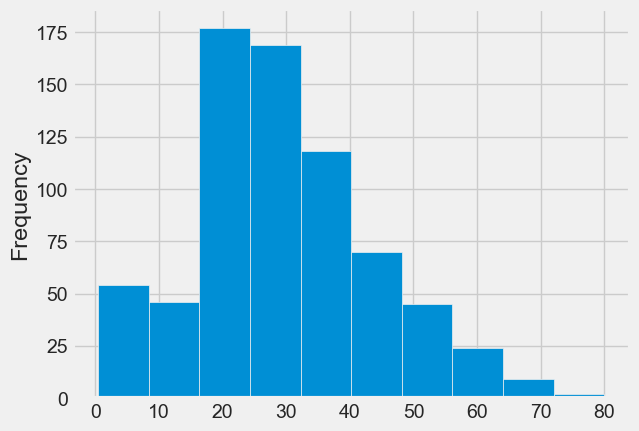

In [89]:
train['Age'].plot(kind='hist')

Text(0.5, 1.0, 'Age Distribution')

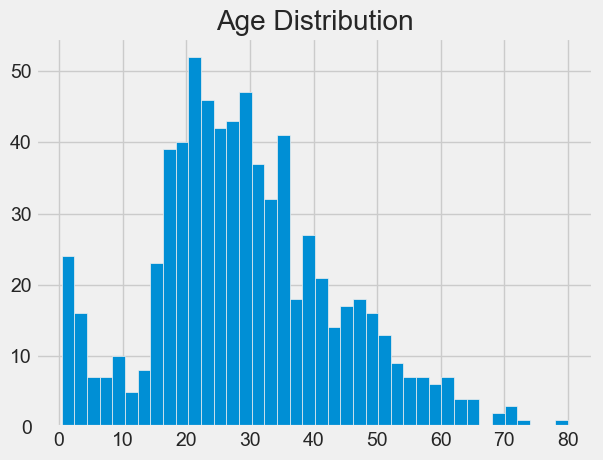

In [90]:
train['Age'].hist(bins=40)
plt.title('Age Distribution')

single person Non-survived count is almost double than survived, while others have 50-50 % ratio

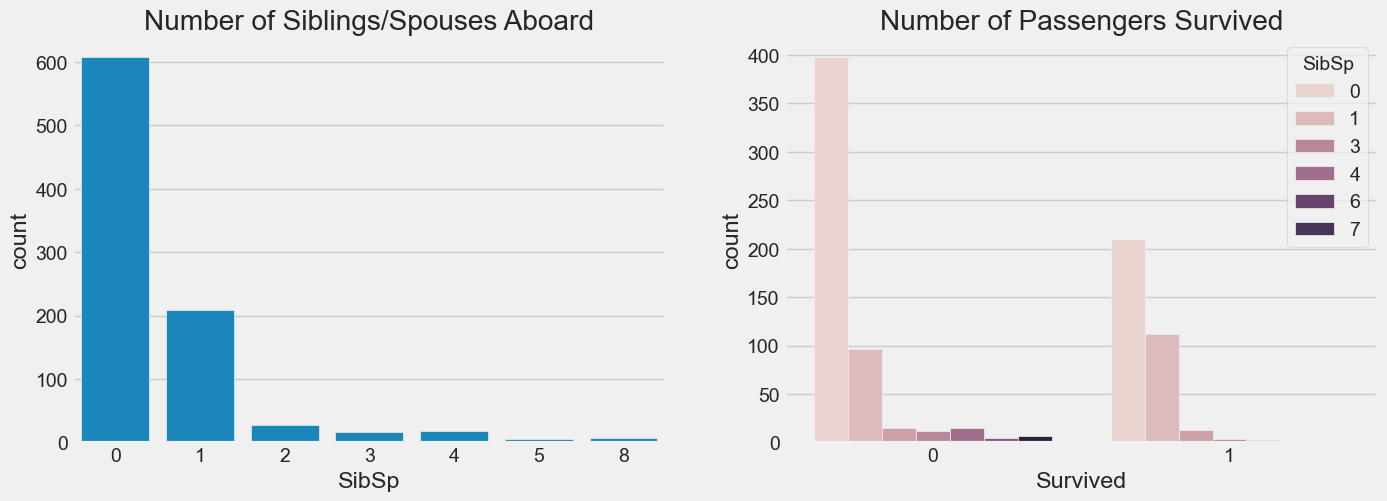

In [91]:
plt.figure(figsize=(15,5))

# First subplot: Count Plot for SibSp
plt.subplot(1,2,1)
sns.countplot(x="SibSp", data=train)  # Corrected
plt.title('Number of Siblings/Spouses Aboard')

# Second subplot: Survival Count by SibSp
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(title="SibSp", loc='upper right')  # Ensure proper legend placement
plt.title('Number of Passengers Survived')

plt.show()


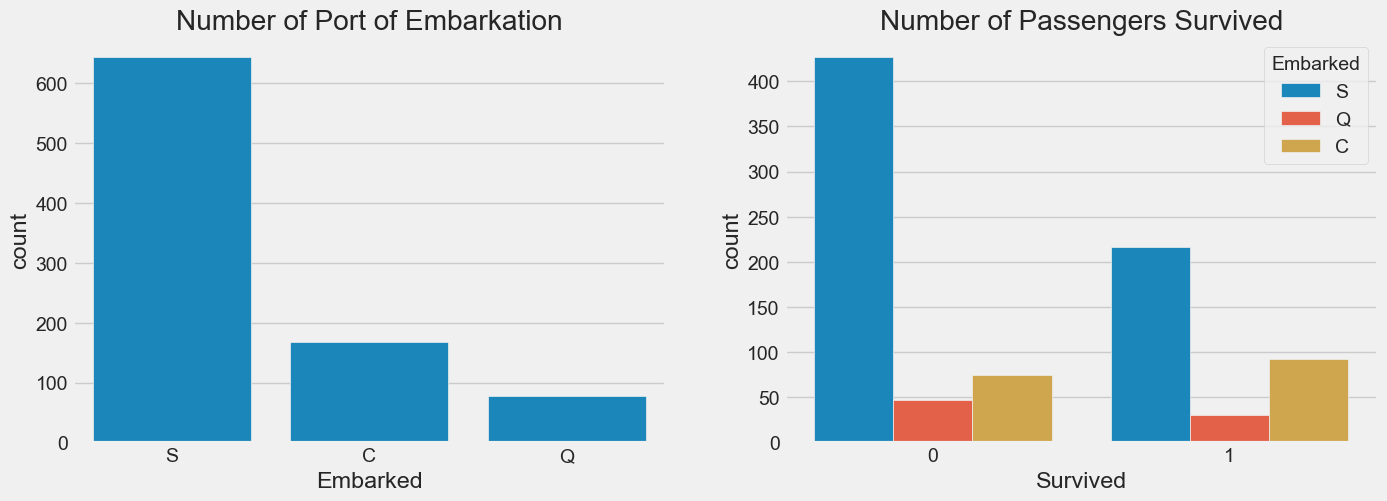

In [92]:
plt.figure(figsize=(15,5))

# First subplot: Count Plot for Embarked
plt.subplot(1,2,1)
sns.countplot(x="Embarked", data=train)  # Corrected
plt.title('Number of Port of Embarkation')

# Second subplot: Survival Count by Embarked
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(title="Embarked", loc='upper right')  # Ensure proper legend placement
plt.title('Number of Passengers Survived')

plt.show()


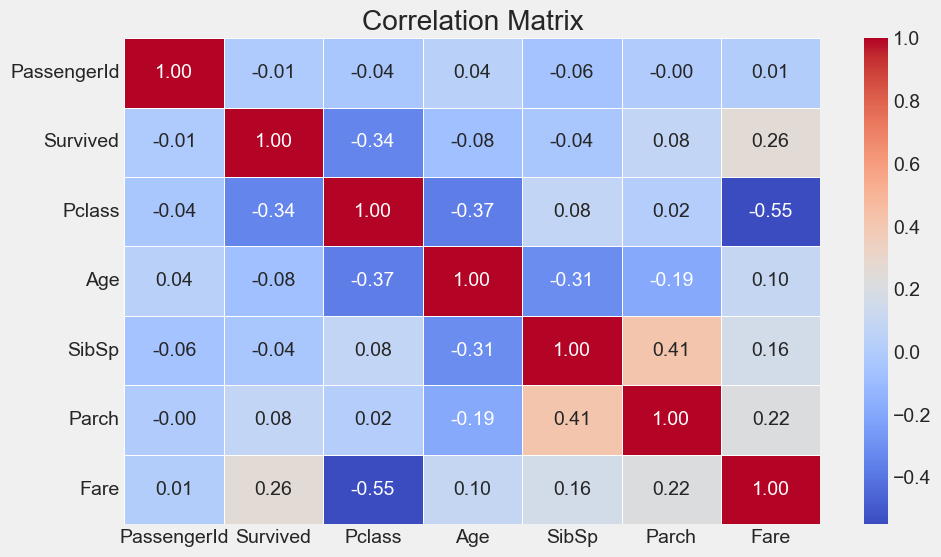

In [93]:
numeric_train = train.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class

In [94]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')


#Same thing for test set
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [95]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

As maximum values in train set is S let's replace it with the null values

In [96]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [97]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [98]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [99]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Preprocessing

Sex is categorical data so we can replace male to 0 and femail to 1

In [100]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [101]:
# Convert 'Sex' column to numeric values using .loc[]
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1


In [102]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

Let's encode with OneHotEncoder technique

In [103]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [104]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [105]:
train.Cabin.tolist()[0:20]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

In [106]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [107]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

What is in the name?
Each passenger Name value contains the title of the passenger which we can extract and discover. To create new variable "Title":

- I am using method 'split' by comma to divide Name in two parts and save the second part
- I am splitting saved part by dot and save first part of the result
- To remove spaces around the title I am using 'split' method
- To visualize, how many passengers hold each title, I chose countplot.

In [108]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [109]:
train['Name'] = train.Name.str.extract(r' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(r' ([A-Za-z]+)\.', expand = False)

In [110]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [111]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [112]:
train['Title'].value_counts(normalize = True) * 100

Title
Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: proportion, dtype: float64

In [113]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer? Yes, it is the size of each family aboard!

In [114]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

C:\Users\User\AppData\Local\Temp\ipykernel_9524\1825208085.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


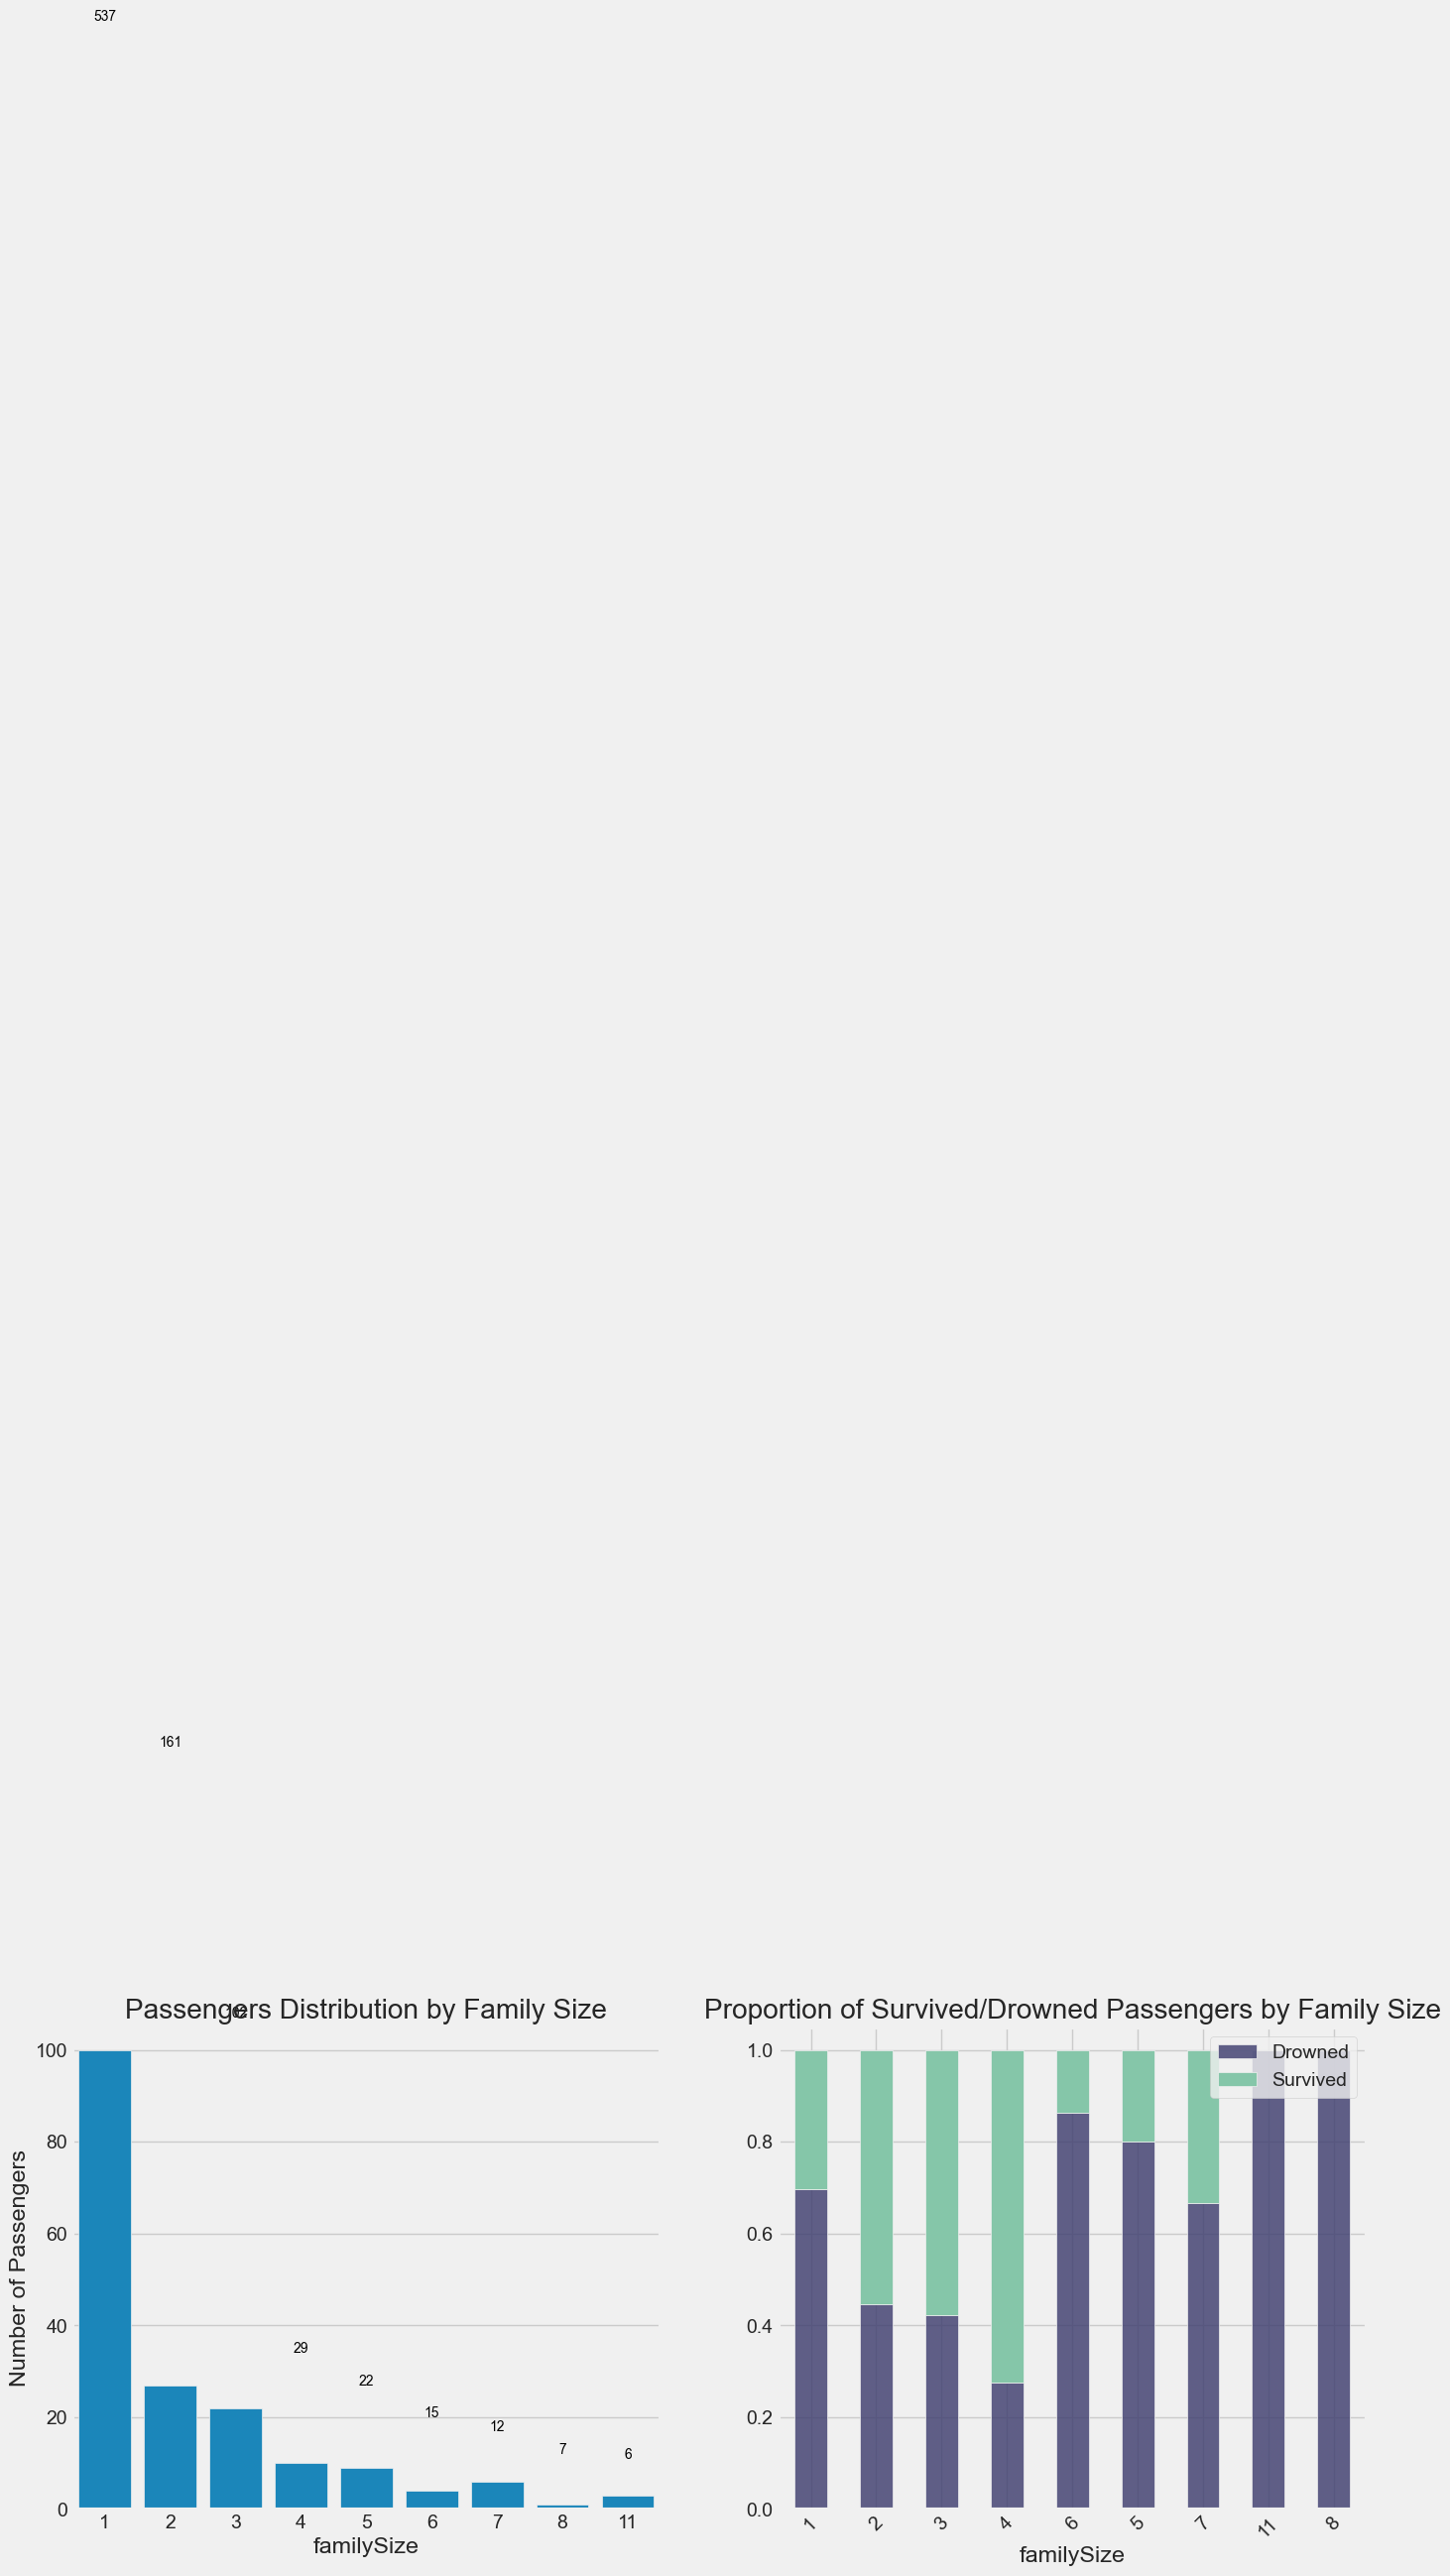

In [116]:
fig = plt.figure(figsize=(15,6))  # Increase size for better clarity

# First subplot: Count Plot for Family Size
ax1 = fig.add_subplot(121)

# Only keep family sizes appearing frequently to avoid clutter
top_family_sizes = train["familySize"].value_counts().index[:10]  # Keep top 10 categories
filtered_train = train[train["familySize"].isin(top_family_sizes)]  

ax = sns.countplot(x="familySize", data=filtered_train, ax=ax1)  # Use `x=` instead of passing a Series
plt.title('Passengers Distribution by Family Size')
plt.ylabel('Number of Passengers')

# Add count annotations on bars
labels = filtered_train["familySize"].value_counts()
for i, v in enumerate(labels):
    ax.text(i, v + 5, str(v), horizontalalignment='center', size=10, color='black')

# Second subplot: Survival by Family Size
ax2 = fig.add_subplot(122)
d = train.groupby('familySize')['Survived'].value_counts(normalize=True).unstack()

# Only keep top family sizes for this plot as well
d = d.loc[top_family_sizes]  

d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked=True, ax=ax2)
plt.title('Proportion of Survived/Drowned Passengers by Family Size')
plt.legend(['Drowned', 'Survived'], loc='upper right')
plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()
plt.show()


In [117]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [119]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

In [140]:
class LogisticRegressionGD:
    """
    Logistic Regression using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        Step size for updating parameters.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    gradient_type : str, default="batch"
        Type of gradient descent: "batch", "stochastic", "mini-batch".
    
    batch_size : int, default=32
        Used only for mini-batch gradient descent.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, gradient_type="batch", batch_size=32):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.gradient_type = gradient_type.lower()
        self.batch_size = batch_size
        self.theta = None
        self.training_loss = []
        self.epsilon = 1e-8  # To prevent log(0) issues

    def sigmoid(self, z):
        """Compute the sigmoid function with safety clipping to prevent overflow."""
        z = np.array(z, dtype=np.float64)  # Ensure correct dtype
        z = np.clip(z, -500, 500)  # Clip values to prevent overflow
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        """Compute logistic regression cost function with numerical stability."""
        m = len(y)
        h = self.sigmoid(X @ self.theta)

        # Clip sigmoid output to avoid log(0) errors
        h = np.clip(h, self.epsilon, 1 - self.epsilon)

        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        """Train logistic regression using gradient descent."""
        print("\n🚀 Training Logistic Regression using Gradient Descent...")
        
        self.training_loss = []

        # Ensure X and y are numpy arrays of type float64
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)  # Ensure y is (m,1)

        m, n = X.shape
        self.theta = np.zeros((n, 1), dtype=np.float64)  # Ensure theta is (n,1)

        for i in range(self.iterations):
            h = self.sigmoid(X @ self.theta)
            gradient = (1/m) * X.T @ (h - y)

            self.theta -= self.learning_rate * gradient

            # Compute and store loss
            cost = self.compute_cost(X, y)
            self.training_loss.append((i, cost))

        print("✅ Training Completed!")


    def predict(self, X):
        """Predict class labels (0 or 1) for new inputs."""
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)
    
    def get_training_loss(self):
        """Returns the recorded training loss."""
        return self.training_loss


In [141]:
model_gd = LogisticRegressionGD(learning_rate=0.01, iterations=2000)
model_gd.fit(X_train, y_train)



🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!


In [142]:
# Convert y_train to NumPy array before reshaping
y_train_np = y_train.to_numpy().reshape(-1, 1)

# Fit the model
model_gd.fit(X_train, y_train_np)

# Make predictions
y_pred_train = model_gd.predict(X_train)
predictions = y_pred_train

# Get training losses
training_losses = model_gd.get_training_loss()



🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!


In [143]:
print(len(training_losses))
training_losses

2000


[(0, 0.6214158553278452),
 (1, 0.6250037338696408),
 (2, 0.803901024669738),
 (3, 2.13903212238307),
 (4, 1.6708714285896036),
 (5, 1.6849467884906995),
 (6, 1.1567416992774522),
 (7, 0.911721977938602),
 (8, 0.7989775924924073),
 (9, 0.8635578155693927),
 (10, 1.3801482183522418),
 (11, 2.1782171084507302),
 (12, 1.3764219370942805),
 (13, 1.1861098725716195),
 (14, 1.0019359017556992),
 (15, 0.9746179334406742),
 (16, 1.1076591930101871),
 (17, 1.825371337744021),
 (18, 1.394877357617267),
 (19, 1.2677632597591102),
 (20, 1.049263058196185),
 (21, 0.9842908515646517),
 (22, 1.0429686001920384),
 (23, 1.5707140010091487),
 (24, 1.4724904601695363),
 (25, 1.5927655871992976),
 (26, 1.1406063069839745),
 (27, 0.9282230050939185),
 (28, 0.8387551893306391),
 (29, 0.9895720120369498),
 (30, 1.4823809654571634),
 (31, 2.0352956210080824),
 (32, 1.3034401908365854),
 (33, 1.0662164645596077),
 (34, 0.9231637044642454),
 (35, 0.9522510440445704),
 (36, 1.2069904730151364),
 (37, 2.0744606352

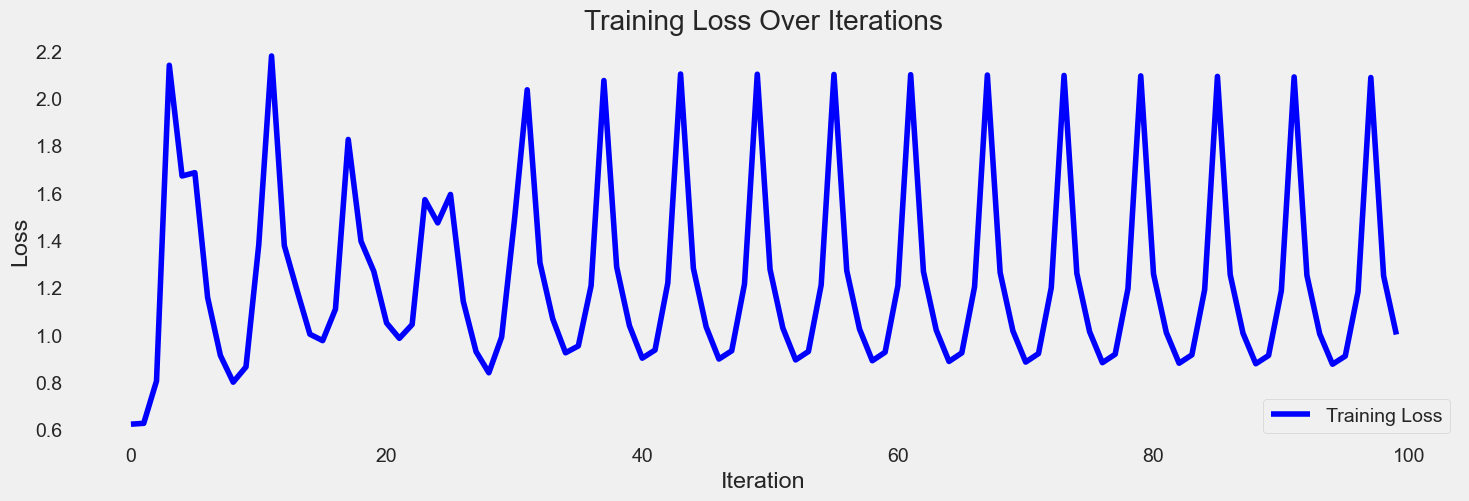

In [149]:
# Extract iteration numbers and corresponding losses
iterations, losses = zip(*model_gd.get_training_loss())

plt.figure(figsize=(16,5))
plt.plot(iterations[:100], losses[:100], label='Training Loss', color='blue')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.grid()

plt.show()

In [ ]:
# # Drop unnecessary columns
# train_data = train_data.drop(["Name", "Ticket", "Cabin"], axis=1)
# test_data = test_data.drop(["Name", "Ticket", "Cabin"], axis=1)

# # Fill missing values
# train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
# test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
# train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)
# test_data["Embarked"].fillna(test_data["Embarked"].mode(), inplace=True)

# # Convert categorical to numerical
# train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)
# test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)

# # Normalize numerical columns
# numerical_features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
# train_data[numerical_features] = (train_data[numerical_features] - train_data[numerical_features].mean()) / train_data[numerical_features].std()
# test_data[numerical_features] = (test_data[numerical_features] - test_data[numerical_features].mean()) / test_data[numerical_features].std()

# # Define target and features
# X_train = train_data.drop(columns=["Survived"]).values
# y_train = train_data["Survived"].values.reshape(-1, 1)

# X_test = test_data.values

# # Add bias term
# X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
# X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]


C:\Users\User\AppData\Local\Temp\ipykernel_10944\1557920018.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10944\1557920018.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [ ]:
# print(f"✅ Feature matrix Train shape: {X_train.shape}")
# print(f"✅ Target vector Train shape: {y_train.shape}")
# print(f"✅ Feature matrix Test shape: {X_test.shape}")


✅ Feature matrix Train shape: (891, 10)
✅ Target vector Train shape: (891, 1)
✅ Feature matrix Test shape: (418, 10)


# Building Funcs

In [ ]:
# class LogisticRegressionGD:
#     """
#     Logistic Regression using Gradient Descent.

#     Parameters:
#     -----------
#     learning_rate : float, default=0.01
#         Step size for updating parameters.
    
#     iterations : int, default=1000
#         Number of optimization iterations.
    
#     gradient_type : str, default="batch"
#         Type of gradient descent: "batch", "stochastic", "mini-batch".
    
#     batch_size : int, default=32
#         Used only for mini-batch gradient descent.
#     """

#     def __init__(self, learning_rate=0.01, iterations=1000, gradient_type="batch", batch_size=32):
#         self.learning_rate = learning_rate
#         self.iterations = iterations
#         self.gradient_type = gradient_type.lower()
#         self.batch_size = batch_size
#         self.theta = None
#         self.training_loss = []
#         self.epsilon = 1e-8  # To prevent log(0) issues

#     def sigmoid(self, z):
#         """Compute the sigmoid function with safety clipping to prevent overflow."""
#         z = np.array(z, dtype=np.float64)  # Ensure correct dtype
#         return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow

#     def compute_cost(self, X, y):
#         """Compute logistic regression cost function with numerical stability."""
#         m = len(y)
#         h = self.sigmoid(X @ self.theta)

#         # Clip sigmoid output to avoid log(0) errors
#         h = np.clip(h, self.epsilon, 1 - self.epsilon)

#         cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
#         return cost

#     def fit(self, X, y):
#         """Train logistic regression using gradient descent."""
#         print("\n🚀 Training Logistic Regression using Gradient Descent...")

#         # Ensure X and y are numpy arrays of type float64
#         X = np.array(X, dtype=np.float64)
#         y = np.array(y, dtype=np.float64)

#         m, n = X.shape
#         self.theta = np.zeros((n, 1), dtype=np.float64)  # Ensure theta is float64

#         for i in range(self.iterations):
#             h = self.sigmoid(X @ self.theta)
#             gradient = (1/m) * X.T @ (h - y)

#             # Ensure gradient is float64 before subtraction
#             self.theta -= self.learning_rate * gradient

#             # Compute and store loss
#             cost = self.compute_cost(X, y)
#             self.training_loss.append(cost)

#         print("✅ Training Completed!")

#     def predict(self, X):
#         """Predict class labels (0 or 1) for new inputs."""
#         return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)
    
#     def get_training_loss(self):
#         """Returns the recorded training loss."""
#         return self.training_loss


In [ ]:
# class LogisticRegressionAdam:
#     """
#     Logistic Regression using Adam Optimization.

#     Parameters:
#     -----------
#     learning_rate : float, default=0.01
#         Step size for updating parameters.
    
#     iterations : int, default=1000
#         Number of optimization iterations.
    
#     beta1 : float, default=0.9
#         Exponential decay rate for first moment estimates (m_t).
    
#     beta2 : float, default=0.999
#         Exponential decay rate for second moment estimates (v_t).
    
#     epsilon : float, default=1e-8
#         A small constant to prevent division by zero.
#     """

#     def __init__(self, learning_rate=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
#         self.learning_rate = learning_rate
#         self.iterations = iterations
#         self.beta1 = beta1
#         self.beta2 = beta2
#         self.epsilon = epsilon
#         self.theta = None
#         self.training_loss = []

#     def sigmoid(self, z):
#         """Compute the sigmoid function."""
#         return 1 / (1 + np.exp(-z))

#     def compute_cost(self, X, y):
#         """Compute the logistic regression cost function."""
#         m = len(y)
#         h = self.sigmoid(X @ self.theta)
#         cost = (-1/m) * np.sum(y * np.log(h + self.epsilon) + (1 - y) * np.log(1 - h + self.epsilon))  # Prevent log(0)
#         return cost

#     def fit(self, X, y):
#         """Trains the logistic regression model using Adam optimization."""
#         print("\n🚀 Training Logistic Regression using Adam Optimization...")

#         # Ensure X and y are numpy arrays of type float64
#         X = np.array(X, dtype=np.float64)
#         y = np.array(y, dtype=np.float64)

#         m, n = X.shape
#         self.theta = np.zeros((n, 1), dtype=np.float64)
#         m_t, v_t = np.zeros((n, 1), dtype=np.float64), np.zeros((n, 1), dtype=np.float64)

#         for i in range(1, self.iterations + 1):
#             h = self.sigmoid(X @ self.theta)
#             gradient = (1/m) * X.T @ (h - y)

#             m_t = self.beta1 * m_t + (1 - self.beta1) * gradient
#             v_t = self.beta2 * v_t + (1 - self.beta2) * (gradient ** 2)

#             # Correct bias in moment estimates
#             m_t_hat = m_t / (1 - self.beta1 ** i + self.epsilon)  # Avoid division by near zero
#             v_t_hat = v_t / (1 - self.beta2 ** i + self.epsilon)

#             # Update weights
#             self.theta -= self.learning_rate * m_t_hat / (np.sqrt(v_t_hat) + self.epsilon)

#             # Compute loss
#             cost = self.compute_cost(X, y)
#             self.training_loss.append(cost)

#         print("✅ Training Completed!")

#     def predict(self, X):
#         """Predicts class labels for input data."""
#         return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)
    
#     def get_training_loss(self):
#         """Returns the recorded training loss over iterations."""
#         return self.training_loss
    


# Training

In [ ]:
# # Train logistic regression models

# print("\n🔄 Starting Model Training...")

# model_gd = LogisticRegressionGD(learning_rate=0.01, iterations=2000)
# model_gd.fit(X_train, y_train)

# model_adam = LogisticRegressionAdam(learning_rate=0.01, iterations=2000)
# model_adam.fit(X_train, y_train)

# print("✅ All models trained successfully!")



🔄 Starting Model Training...

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Adam Optimization...
✅ Training Completed!
✅ All models trained successfully!


# Predicting

In [ ]:
# Make predictions
print("\n📊 Making Predictions...")

y_pred_gd = model_gd.predict(X_test)
# y_pred_adam = model_adam.predict(X_test)

print("✅ Predictions generated!")

# Submit

In [ ]:
# Prepare submission file
submission = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": y_pred_gd.flatten()})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file generated: submission.csv")
